# Лабораторная работа №3
# 6132 Курицын Никита

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def display_2Images(image_1: np.ndarray,names_image_1: str, image_2: np.ndarray,names_image_2: str):
     fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
     axes_1[0].imshow(image_1,cmap='gray', vmin=0, vmax=1)
     axes_1[0].set_title(names_image_1)
     axes_1[0].axis('off')
    
     axes_1[1].imshow(image_2,cmap='gray', vmin=0, vmax=1)
     axes_1[1].set_title(names_image_2)
     axes_1[1].axis('off')

In [3]:
def display_3Images(image_1: np.ndarray,names_image_1: str, image_2: np.ndarray,names_image_2: str, image_3: np.ndarray,names_image_3: str):
     fig_1, axes_1 = plt.subplots(1, 3, figsize=(12, 5))
     axes_1[0].imshow(image_1,cmap='gray', vmin=0, vmax=1)
     axes_1[0].set_title(names_image_1)
     axes_1[0].axis('off')
    
     axes_1[1].imshow(image_2,cmap='gray', vmin=0, vmax=1)
     axes_1[1].set_title(names_image_2)
     axes_1[1].axis('off')

     axes_1[2].imshow(image_3,cmap='gray', vmin=0, vmax=1)
     axes_1[2].set_title(names_image_3)
     axes_1[2].axis('off')

1. Создать средствами OpenCV бинарное изображение с простым рисунком.
Русунок из простых фигур: квадрат, круг и т.д.

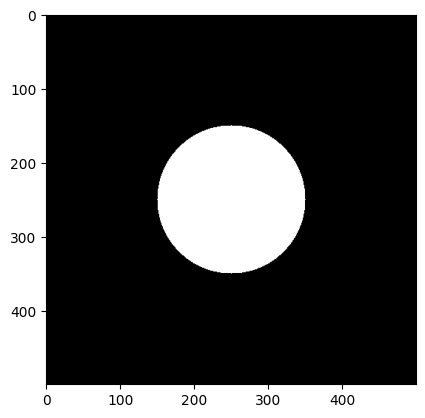

In [4]:
image = np.zeros((500, 500), np.uint8) 
binary_image = cv2.circle(image, (250, 250), 100, 1, -1)
plt.imshow(binary_image,cmap='gray',vmin = 0, vmax = 1)

2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
Вход: изображение из пункта 1
Вывод: зашумленное изображение

In [5]:
def add_noise(image: np.ndarray, p: np.float16):
    noisy_image = np.copy(image)
    row, col = image.shape

    mask = np.random.choice([0, 1], size=(row, col), p = [1 - p, p])

    for i in range(row):
        for j in range(col):
            if mask[i,j] == 1 and noisy_image[i, j] == 1:
                noisy_image[i,j] = 0
            elif mask[i,j] == 1 and noisy_image[i, j] == 0:
                noisy_image[i,j] = 1
    return noisy_image

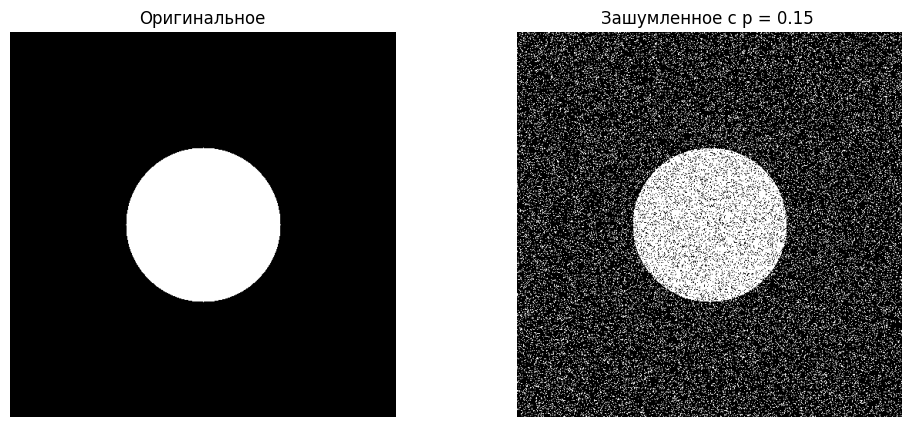

In [6]:
my_p = 0.15
noisy_image = add_noise(binary_image,my_p)
display_2Images(binary_image,"Оригинальное", noisy_image, f"Зашумленное с p = {my_p} ")

3. Написать функции реализации эрозии и дилатации
Функции вида fun(Image, struct)
Где struct - структурный элемент в виде матрицы

In [7]:
def my_fun(noiseImage: np.ndarray,  rank: int, window = np.array([[1,1,1],[1,1,1],[1,1,1]])):
    
    filteredImage = np.zeros_like(noiseImage,dtype =np.uint8)
    window_size = int(len(window)/2)
    
    window = window.flatten()
    padded_noiseImage = np.pad(noiseImage, window_size, mode='edge')
    for i in range(filteredImage.shape[0]):
        for j in range(filteredImage.shape[1]):
                full_screen = padded_noiseImage[i - window_size + 1:i + window_size + 2, j - window_size + 1:j + window_size + 2].flatten()
                array_screen = []
                for l in range(len(full_screen)):
                    for q in range(window[l]):
                            array_screen.append(full_screen[l])
                array_screen = np.sort(np.array(array_screen))
                filteredImage[i,j] = array_screen[rank]
    return filteredImage

In [9]:
def operationErosion(noiseImage: np.ndarray, window = np.array([[1,1,1],[1,1,1],[1,1,1]])):
    
    filteredImage = np.zeros_like(noiseImage,dtype =np.uint8)
    window_size_0 = int(window.shape[0]/2)
    window_size_1 = int(window.shape[1]/2)
    window = window.flatten()
    padded_noiseImage = np.pad(noiseImage, (window_size_0, window_size_1), mode='constant', constant_values = 1)
    for i in range(filteredImage.shape[0]):
        for j in range(filteredImage.shape[1]):
                full_screen = padded_noiseImage[i - window_size_0 + 1:i + window_size_0 + 2, j - window_size_1 + 1:j + window_size_1 + 2].flatten()
                array_screen = []
                for l in range(len(full_screen)):
                    for q in range(window[l]):
                            array_screen.append(full_screen[l])
                array_screen = np.array(array_screen)
                filteredImage[i,j] = int(np.all(array_screen == 1))
            
    return filteredImage

In [10]:
def operationDilation(noiseImage: np.ndarray, window = np.array([[1,1,1],[1,1,1],[1,1,1]])):
    
    filteredImage = np.zeros_like(noiseImage,dtype =np.uint8)
    window_size_0 = int(window.shape[0]/2)
    window_size_1 = int(window.shape[1]/2)
    
    window = window.flatten()
    padded_noiseImage = np.pad(noiseImage, (window_size_0, window_size_1), mode='constant', constant_values = 0)
    for i in range(filteredImage.shape[0]):
        for j in range(filteredImage.shape[1]):
                full_screen = padded_noiseImage[i - window_size_0 + 1:i + window_size_0 + 2, j - window_size_1 + 1:j + window_size_1 + 2].flatten()
                array_screen = []
                for l in range(len(full_screen)):
                    for q in range(window[l]):
                            array_screen.append(full_screen[l])
                array_screen = np.array(array_screen)
                filteredImage[i,j] = int(np.any(array_screen == 1))
            
    return filteredImage

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.

Вход: изображение из пункта 2
Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и изображения после эрозии и дилатации.

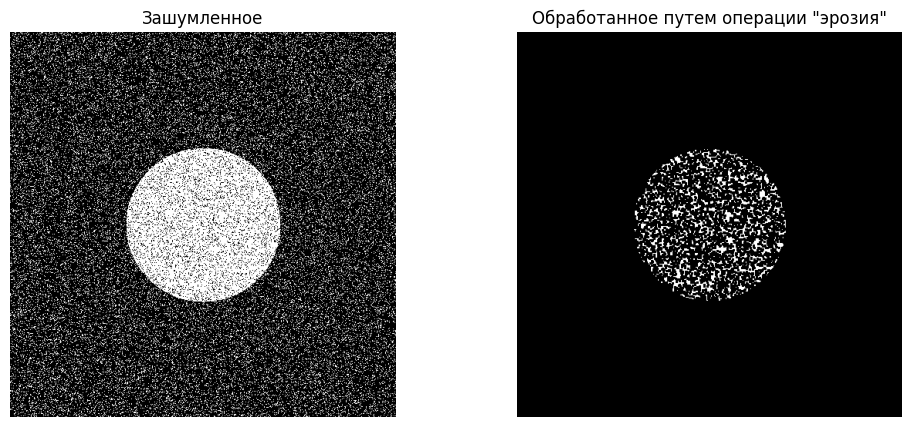

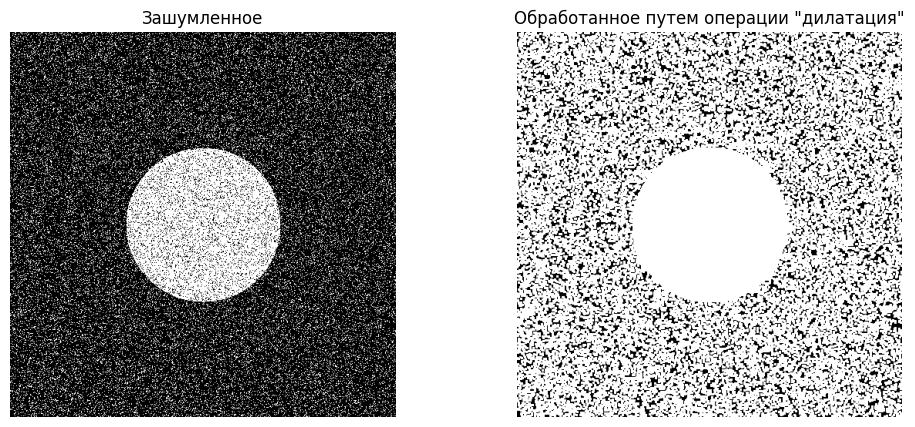

In [11]:
win = np.array([[1,1,1],[1,1,1],[1,1,1]])
dict_operation = {"эрозия": 0,
                 "дилатация": np.sum(win) - 1}
for key in dict_operation:
    new_image = my_fun(noisy_image, dict_operation[key],win)
    display_2Images(noisy_image,"Зашумленное", new_image, f"Обработанное путем операции \"{key}\"")

5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).
Подсчитать коэффициент шума для результа фильтрации.

Вход: изображение из пункта 2
Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и изображения после вскрытия и закрытия. Коэффициент шума.
Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

In [12]:
noiseImage_coefficient = np.sum(np.logical_xor(binary_image, noisy_image).astype(int))
noiseImage_coefficient = noiseImage_coefficient / binary_image.size

In [13]:
def Closing_operation(noiseImage: np.ndarray, window = np.array([[1,1,1],[1,1,1],[1,1,1]])):
    new_image = operationDilation(noiseImage,win)
    new_image = operationErosion(new_image,win)
    noise_coefficient = np.sum(np.logical_xor(binary_image, new_image).astype(int))
    noise_coefficient = noise_coefficient / binary_image.size
    display_3Images(binary_image,"Оригинальное",noisy_image,f"Зашумленное \nКоэффициент шума = {noiseImage_coefficient:.3f}", new_image, f"Обработанное путем операции \"Закрытие\"\nКоэффициент шума = {noise_coefficient:.3f}")

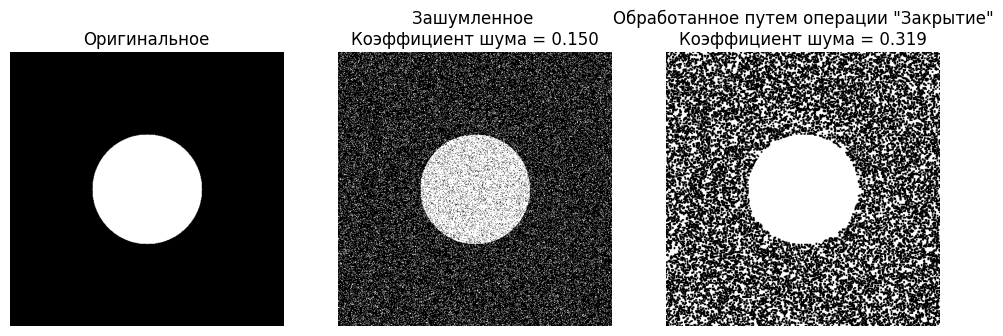

In [14]:
Closing_operation(noisy_image)

In [15]:
def Opening_operation(noiseImage: np.ndarray, window = np.array([[1,1,1],[1,1,1],[1,1,1]])):
    new_image = operationErosion(noiseImage,win)
    new_image = operationDilation(new_image,win)
    noise_coefficient = np.sum(np.logical_xor(binary_image, new_image).astype(int))
    noise_coefficient = noise_coefficient / binary_image.size
    display_3Images(binary_image,"Оригинальное",noisy_image,f"Зашумленное \nКоэффициент шума = {noiseImage_coefficient:.3f}", new_image, f"Обработанное путем операции \"Раскрытия\"\nКоэффициент шума = {noise_coefficient:.3f}")

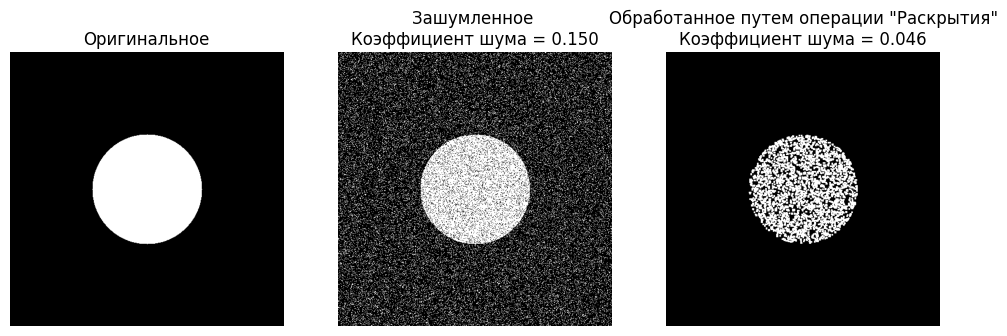

In [16]:
Opening_operation(noisy_image)

6. Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результа фильтрации.

Вход: изображение из пункта 2
Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение. Коэффициент шума.
Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.
Таблица логического фильтра в лекции.

In [17]:
def operationLogicalFilter(noiseImage: np.ndarray, window = np.array([[1,1,1],[1,1,1],[1,1,1]])):
    filteredImage = np.zeros_like(noiseImage,dtype =np.uint8)
    window_size_0 = int(window.shape[0]/2)
    window_size_1 = int(window.shape[1]/2)
    
    window = window.flatten()
    padded_noiseImage = np.pad(noiseImage, (window_size_0, window_size_1), mode='edge')
    for i in range(filteredImage.shape[0]):
        for j in range(filteredImage.shape[1]):
                full_screen = padded_noiseImage[i - window_size_0 + 1:i + window_size_0 + 2, j - window_size_1 + 1:j + window_size_1 + 2].flatten()
                array_screen = []
                for l in range(len(full_screen)):
                    for q in range(window[l]):
                            array_screen.append(full_screen[l])
                array_screen = np.array(array_screen)
                x_0 = array_screen[int(len(array_screen) / 2)]
                array_screen = np.delete(array_screen, int(len(array_screen) / 2))
                res = int(x_0 and int(np.any(array_screen)))
                res2 = int(1 - x_0 and int(np.all(array_screen)))
                filteredImage[i,j] = int(res or res2)
    return filteredImage

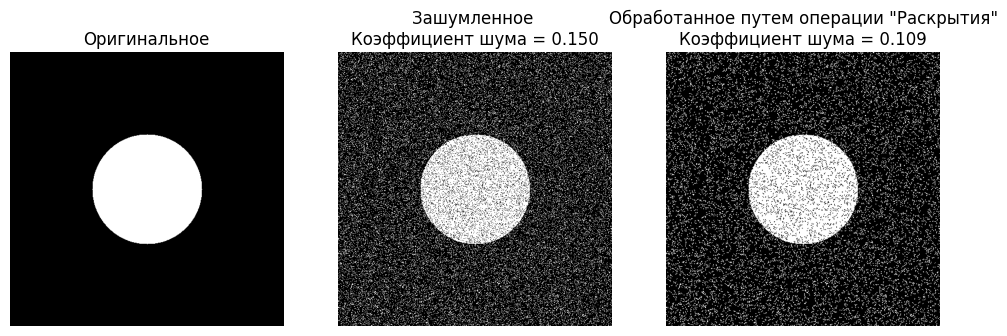

In [18]:
log_image = operationLogicalFilter(noisy_image)
noise_coefficient = np.sum(np.logical_xor(binary_image, log_image).astype(int))
noise_coefficient = noise_coefficient / binary_image.size
display_3Images(binary_image,"Оригинальное",noisy_image,f"Зашумленное \nКоэффициент шума = {noiseImage_coefficient:.3f}", log_image, f"Обработанное путем операции \"Раскрытия\"\nКоэффициент шума = {noise_coefficient:.3f}")

7. На исходном изображении с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.

Вход: изображение из пункта 1
Вывод: исходное изображение, изображение с выделенными контурами.

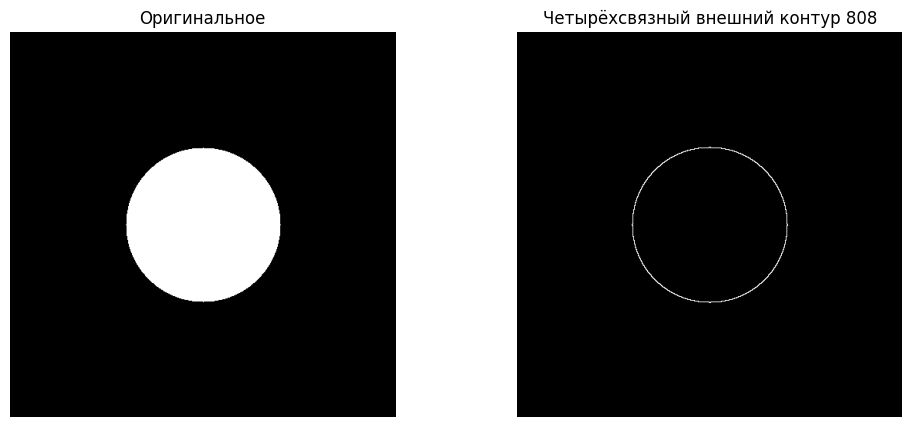

In [19]:
result_image = operationDilation(binary_image,np.array([[1,1,1],[1,1,1],[1,1,1]]))
# берется маска и операция дилатация
# 1 1 1
# 1 1 1
# 1 1 1
externalСountour = np.logical_xor(binary_image, result_image)
display_2Images(binary_image,"Оригинальное", externalСountour, f"Четырёхсвязный внешний контур {np.sum(externalСountour)}")

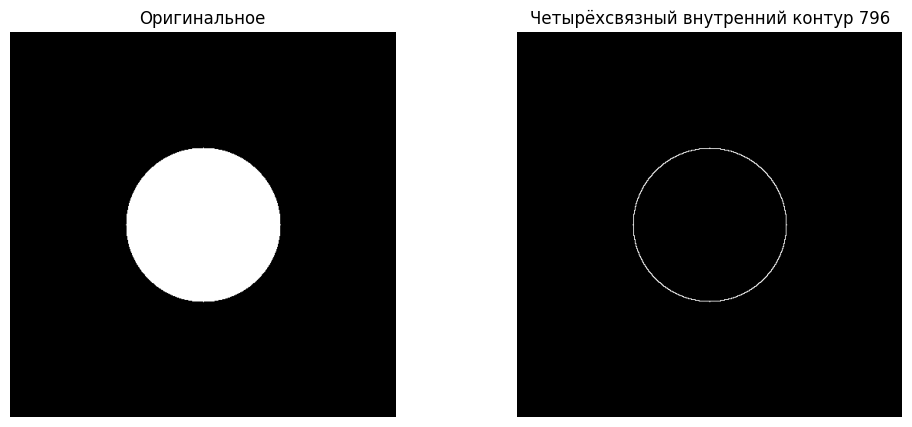

In [20]:
result_image = operationErosion(binary_image,np.array([[1,1,1],[1,1,1],[1,1,1]]))
# берется маска и операция эрозия
# 1 1 1
# 1 1 1
# 1 1 1
innerCountour = np.logical_xor(binary_image, result_image)
display_2Images(binary_image,"Оригинальное", innerCountour, f"Четырёхсвязный внутренний контур {np.sum(innerCountour)}")

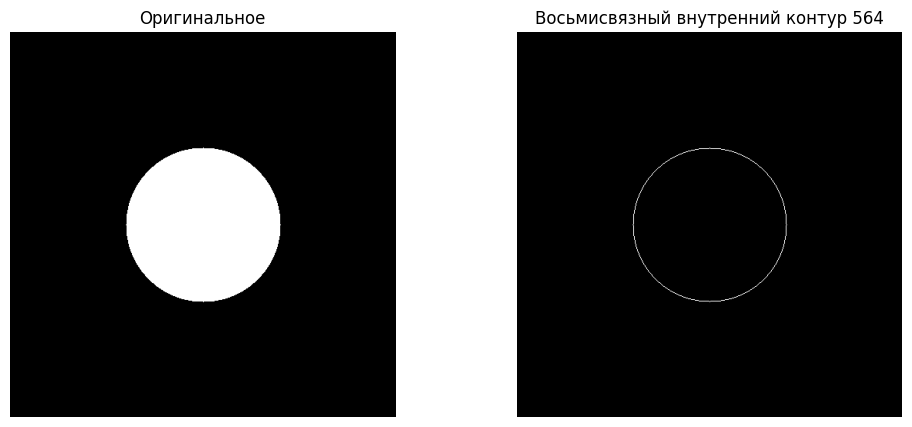

In [22]:
result_image = operationErosion(binary_image,np.array([[0,1,0],[1,1,1],[0,1,0]]))
# берется маска и операция эрозия
# 0 1 0
# 1 1 1
# 0 1 0
eight_innerCountour = np.logical_xor(binary_image, result_image)
display_2Images(binary_image,"Оригинальное", eight_innerCountour, f"Восьмисвязный внутренний контур {np.sum(eight_innerCountour)}")

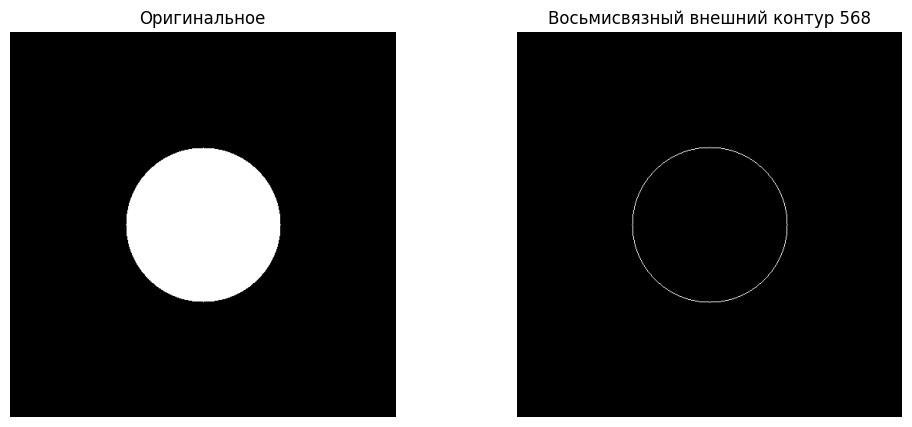

In [23]:
result_image = operationDilation(binary_image,np.array([[0,1,0],[1,1,1],[0,1,0]]))
# берется маска и операция дилатация
# 0 1 0
# 1 1 1
# 0 1 0
eight_foldCountour = np.logical_xor(binary_image, result_image)
display_2Images(binary_image,"Оригинальное", eight_foldCountour, f"Восьмисвязный внешний контур {np.sum(eight_foldCountour)}")

8. На исходном изображении с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.

Вход: изображение из пункта 1
Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

In [24]:
image_new = np.zeros((500, 500), np.uint8)
x, y = 200, 200  
width, height = 100, 100  


binary_image_new = cv2.rectangle(image_new, (x, y), (x + width, y + height), 1, -1)

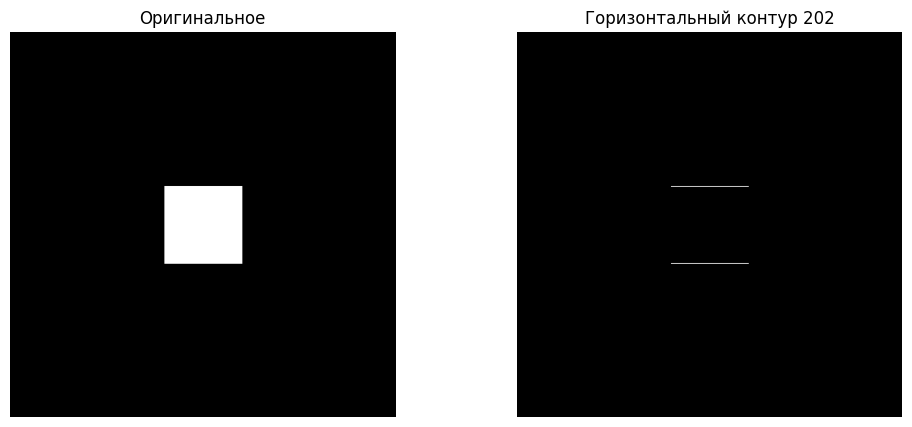

In [25]:
result_image = operationErosion(binary_image_new,np.array([[0,1,0],[0,1,0],[0,1,0]]))
horizontalCountour = np.logical_xor(binary_image_new, result_image)
display_2Images(binary_image_new,"Оригинальное", horizontalCountour, f"Горизонтальный контур {np.sum(horizontalCountour)}")

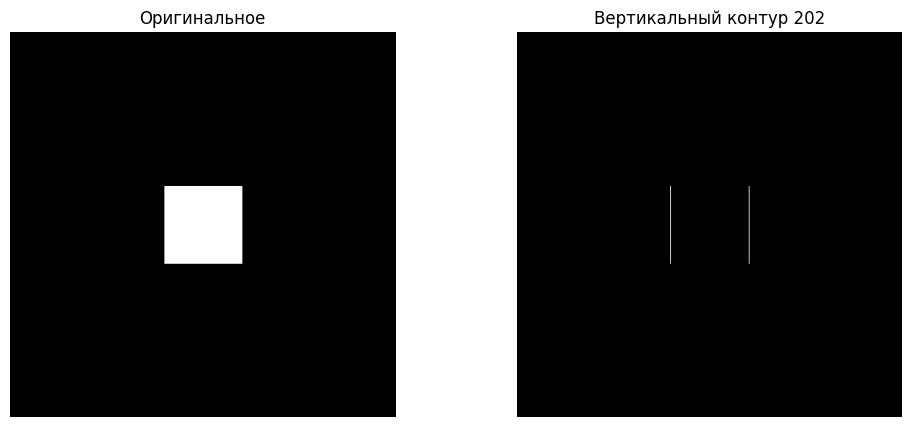

In [26]:
result_image = operationDilation(binary_image_new, np.array([[0,0,0],[1,1,1],[0,0,0]]))
verticalCountour = np.logical_xor(binary_image_new, result_image)
display_2Images(binary_image_new,"Оригинальное", verticalCountour, f"Вертикальный контур {np.sum(verticalCountour)}")